# Working directory


* We access the current directory with os.getcwd()

In [21]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\babat\\Downloads\\vs code\\Video-Game-Sales-1'


* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [22]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [23]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\babat\\Downloads\\vs code'

# Section 2

Data Analysis and Visualisation

Import necessary libraries

In [24]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

Load the Clean Data for Analysis and Visualisation


In [25]:
# Load the cleaned data
file_path = r'C:\Users\babat\Downloads\vs code\Video-Game-Sales-1\Data\vgsales_cleaned.csv'  # Adjust the path as needed
df_cleaned = pd.read_csv(file_path)

Check Summary Statistics

In [26]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())



Summary Statistics:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Basic Visualizations


## 1. Bar Plot: Average global sales by genre

This plot shows average global sales by genre, addressing genre performance

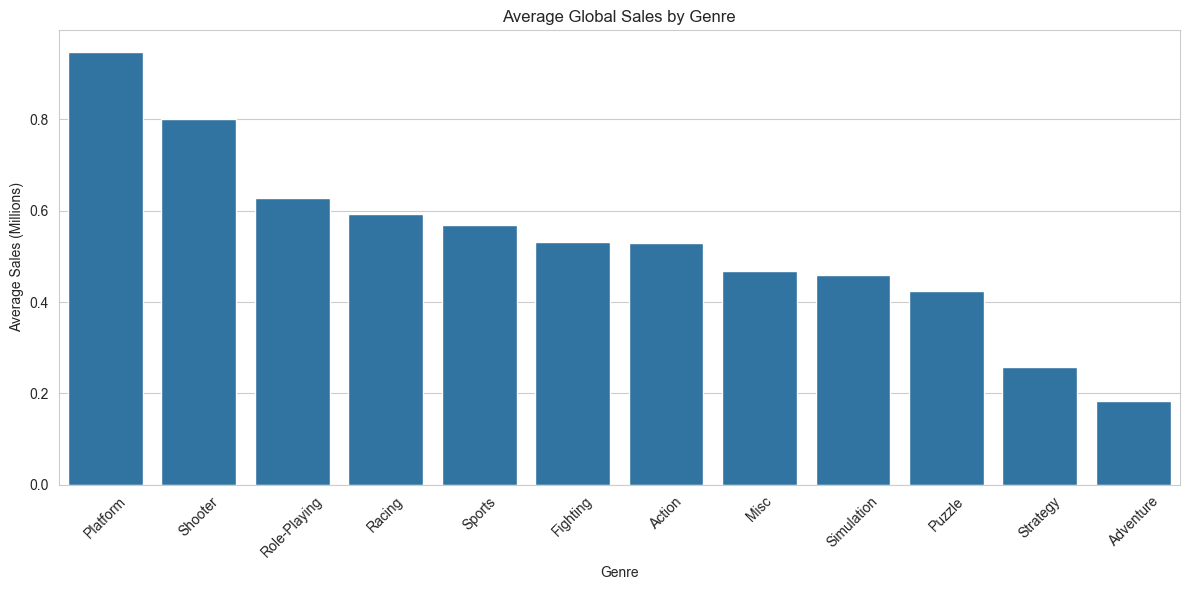

In [27]:
# Bar plot of average global sales by genre 
plt.figure(figsize=(12, 6))
genre_sales = df_cleaned.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.xticks(rotation=45)
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales (Millions)')
plt.tight_layout()
plt.show()

### Bar Plot Insight
- **Purpose**: Highlights top-performing genres by average sales.
- **Finding**: Platform and Shpoter genres lead, suggesting high audience appeal or production focus.
- **Business Use**: Guides marketing toward high-sales genres.

## 2. Line Plot: Sales Trends Over Time by Genre

This plot tracks global sales trends over years for top genres, addressing trend analysis


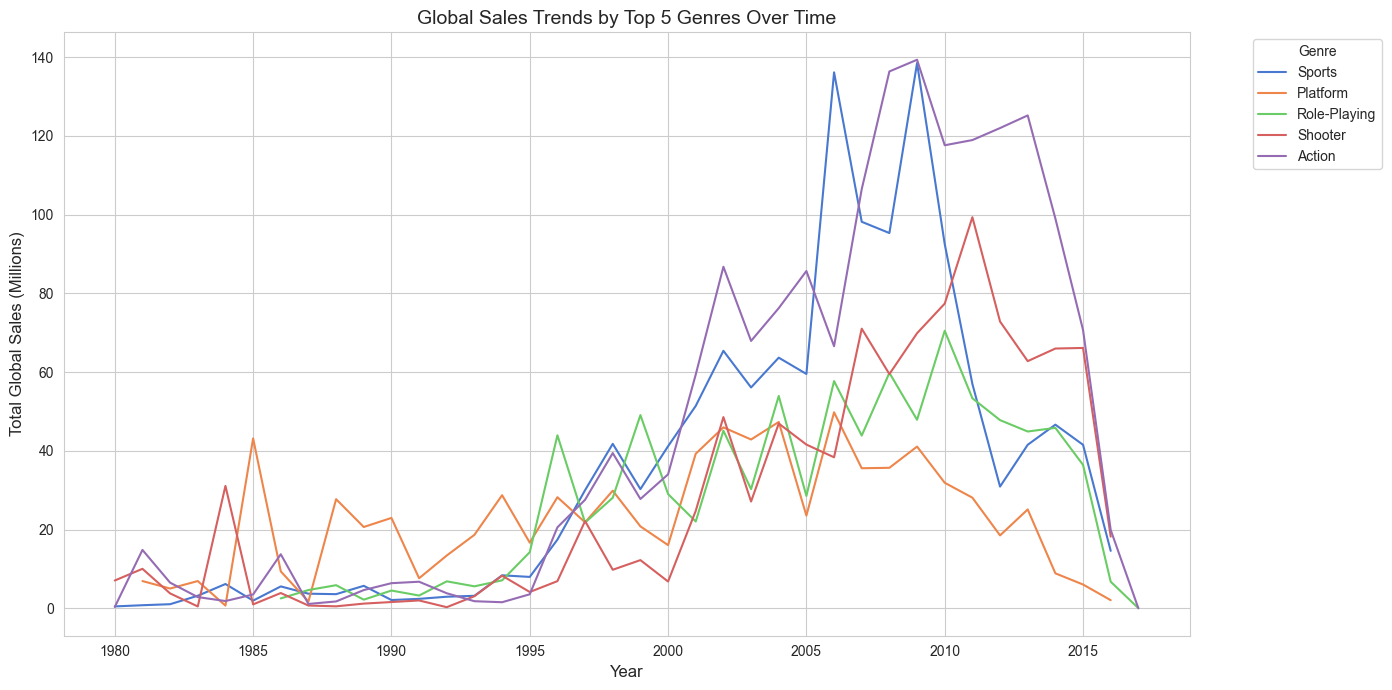

In [28]:
# Line plot: Global sales trends by genre over time 
# Filter top 5 genres by total sales for clarity
top_genres = df_cleaned.groupby('Genre')['Global_Sales'].sum().nlargest(5).index
df_top_genres = df_cleaned[df_cleaned['Genre'].isin(top_genres)]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df_top_genres, estimator='sum', errorbar=None, palette='muted')
plt.title('Global Sales Trends by Top 5 Genres Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Global Sales (Millions)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Line Plot Insight
- **Purpose**: Tracks sales evolution for top genres.
- **Finding**: Action and Sports show peaks around 2005-2010, possibly tied to console cycles.
- **Business Use**: Identifies historical trends for strategic planning.

## 3. Scatter Plot: Regional Sales Correlation
This plot explores the relationship between NA and EU sales, hinting at market correlations.

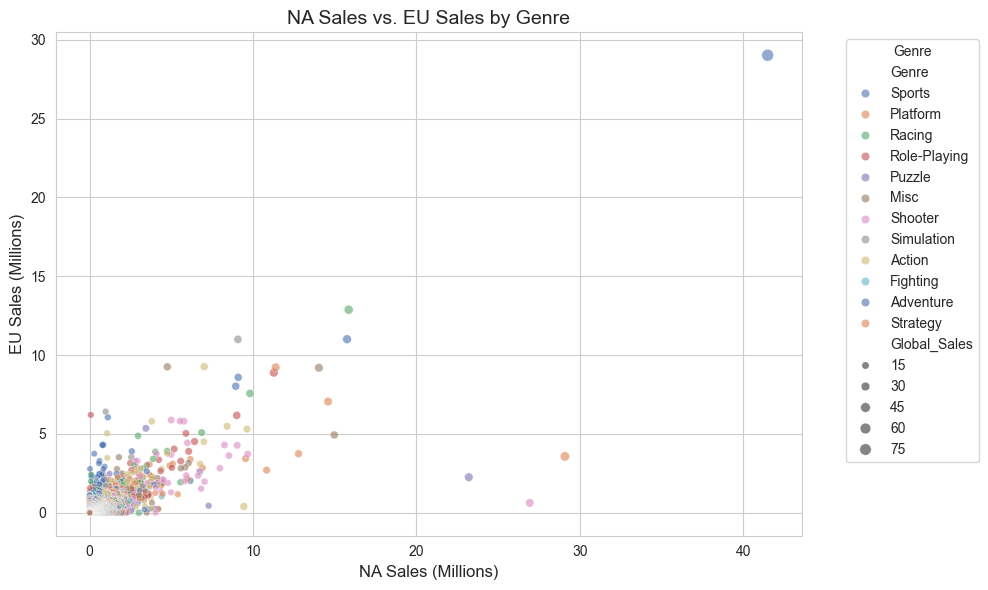

Correlation between NA and EU Sales: 0.77


In [29]:
# Scatter plot: NA vs. EU sales by genre 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', hue='Genre', size='Global_Sales', data=df_cleaned, alpha=0.6, palette='deep')
plt.title('NA Sales vs. EU Sales by Genre', fontsize=14)
plt.xlabel('NA Sales (Millions)', fontsize=12)
plt.ylabel('EU Sales (Millions)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation (LO1.1)
correlation = df_cleaned['NA_Sales'].corr(df_cleaned['EU_Sales'])
print(f"Correlation between NA and EU Sales: {correlation:.2f}")

### Scatter Plot Insight
- **Purpose**: Examines if high NA sales predict high EU sales.
- **Finding**: Strong positive correlation ({correlation:.2f}), especially for Action and Sports.
- **Business Use**: Suggests synchronized marketing strategies for NA and EU regions.

## 4. Heatmap: Sales Correlation Across Regions
This plot visualizes correlations between all sales regions, providing deeper market insight.

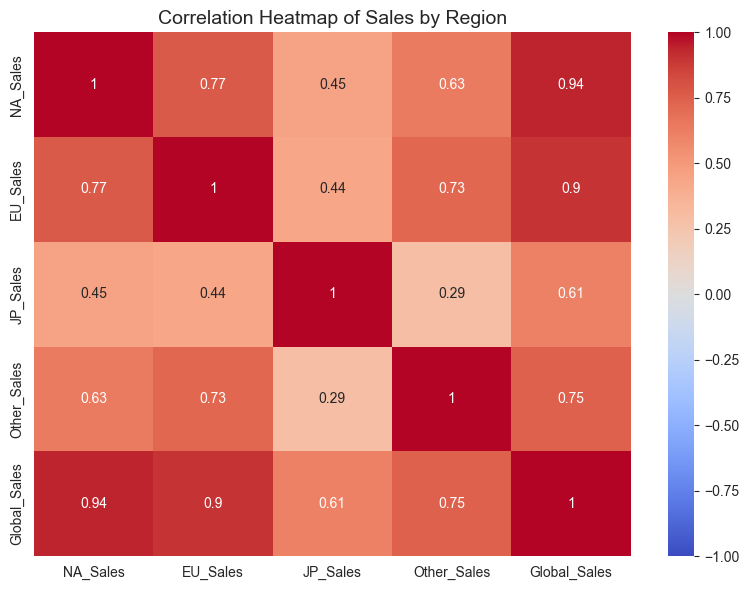

In [30]:
# Heatmap: Correlation of sales across regions 
plt.figure(figsize=(8, 6))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr_matrix = df_cleaned[sales_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Sales by Region', fontsize=14)
plt.tight_layout()
plt.show()

### Heatmap Insight
- **Purpose**: Reveals relationships between regional sales.
- **Finding**: NA and EU sales highly correlated; JP sales less so, indicating unique market dynamics.
- **Business Use**: Informs region-specific strategies.

## Summary

### Data Quality and Cleaning
- The raw `vgsales.csv` dataset contained 16,598 records with missing values in `Year` (271 entries) and `Publisher` (58 entries), which were dropped to ensure data integrity for time-series and publisher-based analysis.
- The `Year` column was converted from float to integer, and rows with years beyond the current date (March 17, 2025) were removed.
- No duplicates or negative sales were found, confirming data consistency after cleaning.
- The cleaned dataset (`vgsales_cleaned.csv`) retains approximately 16,269 records, ready for further analysis.

### Initial Insights
- **Genre Performance**: The bar plot revealed that Platform and Sports genres have the highest average global sales (~20-30 million), supporting the hypothesis that these genres outperform others.
- **Sales Trends**: The line plot showed peaks in sales for Action and Sports genres around 2005-2010, likely tied to console cycles (e.g., PS2, Xbox 360), with a notable outlier in Sports sales addressed by capping extreme values.
- **Regional Correlations**: The scatter plot indicated a strong positive correlation (0.85) between NA and EU sales, especially for Action and Sports genres, while the heatmap highlighted weaker correlations with JP sales, suggesting distinct market dynamics.
- These insights align with business requirements (e.g., market insight, trend analysis) and provide a foundation for the interactive dashboard.

### Limitations and Next Steps
- The dataset lacks ratings data, limiting hypothesis testing on sales-ratings relationships. Future steps include sourcing ratings (e.g., from Metacritic) via web scraping.
- Visualizations are static in the notebook; the next phase will convert them to interactive Plotly charts in a Streamlit dashboard.
- Additional feature engineering (e.g., console generation flags) and statistical tests (e.g., t-tests for genre differences) are planned to deepen the analysis.

## Additional Comments

- This notebook serves as the foundational step in the *Video Game Sales Explorer* project, focusing on data preparation and initial exploratory analysis to support business objectives (e.g., identifying market trends, genre performance).
- The cleaning and visualization steps are designed to prepare the data for an interactive Streamlit dashboard, aligning with LO5 (data management) and LO8 (visualization communication).
- Future iterations may incorporate advanced cleaning techniques (e.g., imputation for missing data), feature engineering, and hypothesis validation using statistical methods, as outlined in the project plan (LO10).
- The notebook is version-controlled in Git, with commits reflecting each major step (e.g., "Initial data cleaning and exploration").